c:\Users\mrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\mrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting

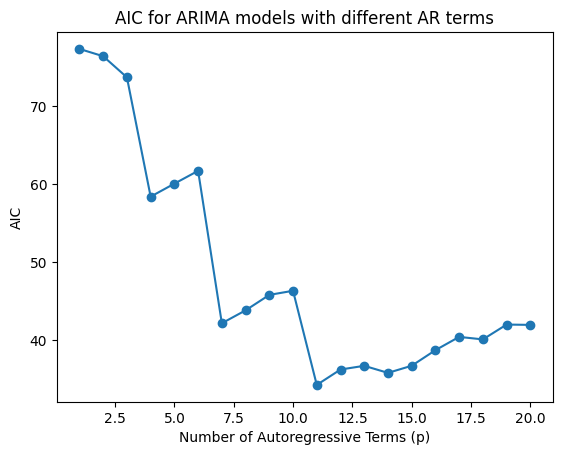

Optimal number of autoregressive terms: 11


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your stock price data
data = pd.read_csv('stock_prices.csv')
prices = data['Close']

# Determine the order of differencing
diff = prices.diff().dropna()

# Fit ARIMA models with varying autoregressive terms
aic_values = []
for p in range(1, 21):  # testing AR terms from 1 to 20
    model = ARIMA(prices, order=(p, 1, 0))  # d=1 for differencing
    model_fit = model.fit()
    aic_values.append(model_fit.aic)

# Plot AIC values
plt.plot(range(1, 21), aic_values, marker='o')
plt.xlabel('Number of Autoregressive Terms (p)')
plt.ylabel('AIC')
plt.title('AIC for ARIMA models with different AR terms')
plt.show()

# Optimal number of AR terms
optimal_p = np.argmin(aic_values) + 1
print(f'Optimal number of autoregressive terms: {optimal_p}')

In [3]:
import pandas as pd

# Example stock price data
stock_prices = [
    100.12, 100.78, 101.45, 102.34, 101.89, 102.56, 103.45, 104.23, 103.89, 104.56, 
    105.34, 106.12, 106.78, 107.45, 108.34, 107.89, 108.56, 109.45, 110.23, 109.89, 
    110.56, 111.34, 112.12, 112.78, 113.45, 114.34, 113.89, 114.56, 115.34, 116.12, 
    116.78, 117.45, 118.34, 117.89, 118.56, 119.45, 120.23, 119.89, 120.56, 121.34
]

# Create a DataFrame
data = pd.DataFrame(stock_prices, columns=['Close'])

# Save the DataFrame as a CSV file
data.to_csv('stock_prices.csv', index=False)

print(data.head())

    Close
0  100.12
1  100.78
2  101.45
3  102.34
4  101.89
